# Pipelinesへようこそ！

Huggingface Transformers Libraryは、2つの異なるレベルでAPIを提供します。

典型的な推論タスクにOSSモデルを使用するための高レベルAPIは、「pipeline」と呼ばれます。非常に使いやすいです。

次のようなものを使用してpipelineを作成します。

`my_pipeline = pipeline("the_task_I_want_to_do")`

に続く

`result = my_pipeline(my_input)`

そしてそれだけです！

すべてのpipelineのリストについては、このColabの終わりを参照してください。

## 開始する前：Colabを使用するための2つの重要なプロチップ：

**Pro-tip 1:**

すべてのColabの上部には、いくつかのpipインストールがあります。これを実行すると、pipからエラーを受信する場合があります。

> gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.

これらのpip互換性エラーは安全に無視できます。そして、バージョン番号を変更することでそれらを修正しようとするのは魅力的ですが、実際に実際の問題を導入します！

**Pro-tip 2:**

Colabを実行している最中に、次のようなエラーが発生する可能性があります。

> Runtime error: CUDA is required but not available for bitsandbytes. Please consider installing [...]

これは非常に誤解を招くエラーメッセージです。パッケージのバージョンを変更しないでください。

これは、GoogleがColabランタイムを切り替えたために実際に起こります。おそらくGoogle Colabが忙しすぎたためです。解決策は次のとおりです。

1. カーネルメニュー >> ランタイムを切断して削除
2. 新鮮なメニューからColabをリロードし、メニュー >> すべての出力をクリア
3. 右上のボタンを使用して新しいT4に接続
4. 右上のメニューから「リソースを表示」を選択して、GPUがあることを確認
5. Colab内のセルを上下から、pipのインストールから始めて再実行

そして、すべてがうまくいくはずです - そうでなければ、私に尋ねてください！

## sidenote：

あなたはすでにこれを知っているかもしれませんが、私がここで使用している「推論」という言葉に慣れていない場合に備えて：

データサイエンスモデルを使用する場合、2つの非常に異なるアクティビティを実行することができます。**トレーニング**および**推論**。

### 1. トレーニング  

**トレーニング**は、将来のタスクで改善するために適応するためのデータをモデルに提供する場合です。これは、内部設定、つまりモデルのパラメーターまたは重みを更新することで行います。すでにいくつかのトレーニングがあるモデルをトレーニングする場合、アクティビティは「微調整」と呼ばれます。

### 2. 推論

**推論**は、_alreadyがトレーニングされたモデルを使用している場合です。そのモデルを使用して、新しい入力に新しい出力を生成し、訓練中に学んだことすべてを利用しています。推論は、「実行」または「モデルの実行」とも呼ばれることもあります。

最後の数週間のGPT、Claude、GeminiのAPIのすべての使用は、**推論**の例です。 GPTの「P」は「事前に訓練された」を表しています。つまり、6週目にデータですでに訓練されていることを意味します。
  
HuggingfaceのパイプラインAPIは、**推論**  - 既にトレーニングされているモデルを実行するためのみです。 7週目には、独自のモデルをトレーニングします。また、アップコミングの講義で検討しているより高度なHuggingface APIを使用する必要があります。

このプレイリストをYouTubeに録音しました。  
https://www.youtube.com/playlist?list=plwhe-9gp9smmdl6slaovuqf2abilgbmjs


In [1]:
# これにより、pip依存関係の競合に関する「エラー」が得られる場合は、それを無視してください！それは何にも影響しません。
!pip install -q --upgrade torch==2.5.1+cu124 torchvision==0.20.1+cu124 torchaudio==2.5.1+cu124 --index-url https://download.pytorch.org/whl/cu124
!pip install -q --upgrade transformers==4.48.3 datasets==3.2.0 diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# import

# PyTorch
import torch
# Google Colab でSecretを安全に使う
from google.colab import userdata
# Hugging Face Hub にログイン
from huggingface_hub import login
# Hugging Face の transformers の pipeline
from transformers import pipeline
# Hugging Face の diffusers の DiffusionPipeline
from diffusers import DiffusionPipeline
# Hugging Face の Datasets の load_dataset
from datasets import load_dataset
# 音声ファイル（.wav, .flac など）読み書き
import soundfile as sf
# Colab や Jupyter Notebook 上で音声を再生
from IPython.display import Audio

# 重要なメモ

講義でこれについては言及していませんでしたが、以前に行ったことがない場合は、Hugging Face Hubにログインする必要がある場合があります。

1. まだ行っていない場合は、https://huggingface.coで **free** Huggingfaceアカウントを作成し、右上のユーザーメニューから[設定]に移動します。次に、新しいAPIトークンを作成し、書き込み許可を与えます。  

**重要** Huggingface APIキーを作成する場合、[書き込み]タブをクリックして、キーの読み取り/書き込み許可を必ず選択してください。そうしないと、後で問題が発生する可能性があります。

2. ここに戻って、サイドパネルの「キー」アイコンを左側に押して、新しい秘密を追加します。  
  名前フィールドに「HF_TOKEN」を入れます  
  値フィールドに実際のトークンを置きます： `hf _...`  
  「ノートブックからのアクセス	」スイッチがオンになっていることを確認してください。

3. 下のセルを実行してログインします。各Colabでこれを行う必要があります。
  SecretをColabに入力する必要なく、秘密を管理するための本当に便利な方法です。
  また、以下の行を単純に上書きするショートカットもあります。`hf_token =" hf _.... "`  
  しかし、これはベストプラクティスではありません。
  Colabを共有しないように注意する必要があるからです。
  そして、Colabについての素晴らしいことの1つは、それらを共有できることです！

In [3]:
# Hugging Face Hub にプログラムからログイン
hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

In [4]:
# Hugging Face の transformers pipeline ライブラリを使った 感情分析
# pipelineの第一引数は、task identifier らしい。

classifier = pipeline("sentiment-analysis", device="cuda")
# LLM マスターへの道を歩んでいることをとても嬉しく思っています!
result = classifier("I'm super excited to be on the way to LLM mastery!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9993460774421692}]


In [5]:
# Hugging Face の transformers pipeline ライブラリを使った 名前付きエンティティ認識
# 名前付きエンティティ認識：文中の 固有名詞や役職などのエンティティを抽出する。

ner = pipeline("ner", grouped_entities=True, device="cuda")
# バラク・オバマはアメリカ合衆国の第44代大統領でした。
result = ner("Barack Obama was the 44th president of the United States.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.99918306), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9986908), 'word': 'United States', 'start': 43, 'end': 56}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [6]:
# Hugging Face の transformers pipeline ライブラリを使った コンテキストでの質問

question_answerer = pipeline("question-answering", device="cuda")

# question="第44代アメリカ合衆国大統領は誰でしたか？
# context="バラク・オバマは第44代アメリカ合衆国大統領でした。
result = question_answerer(question="Who was the 44th president of the United States?", context="Barack Obama was the 44th president of the United States.")

print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'score': 0.9889456033706665, 'start': 0, 'end': 12, 'answer': 'Barack Obama'}


In [7]:
# Hugging Face の transformers pipeline ライブラリを使ったテキスト要約

summarizer = pipeline("summarization", device="cuda")

"""
Hugging Face トランスフォーマーライブラリは、自然言語処理（NLP）のための非常に汎用性が高く強力なツールです。
テキスト分類、固有表現抽出、質問応答など、幅広いタスクを実行できます。
オープンソースのデータサイエンスコミュニティで広く使用されている、非常に人気のあるライブラリです。
データサイエンティストにトランスフォーマーモデルを生産的かつ便利に操作する方法を提供することで、この分野への参入障壁を下げます。
"""

text = """The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP).
It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering, among others.
It's an extremely popular library that's widely used by the open-source data science community.
It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models.
"""

summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


 The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing . It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering .


In [8]:
# このコードは、Hugging Face の transformers pipeline ライブラリを使ったテキスト翻訳

translator = pipeline("translation_en_to_fr", device="cuda") # 標準タスクに「translation_en_to_ja」が無いらしい

# データ サイエンティストたちは、HuggingFace パイプライン API のパワーとシンプルさに本当に驚いていました。
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")

print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


In [11]:
# 別のモデルを指定して翻訳（酷い結果になった（笑））
# 翻訳モデル一覧：https：//huggingface.co/models?pipeline_tag=translation&sort=trending

translator = pipeline("translation_en_to_ja", model="Helsinki-NLP/opus-mt-en-jap", device="cuda")#"translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es", device="cuda")

# データ サイエンティストたちは、HuggingFace パイプライン API のパワーとシンプルさに本当に驚いていました。
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")

print(result[0]['translation_text'])

Device set to use cuda


アビクリスナ と パレゴン は , より も 力 も 驚 き , また , パレスクム の パトレス ・ スケリス が い る と , よく 驚 い た .


In [12]:
# Hugging Face の transformers pipeline ライブラリを使ったテキスト分類

classifier = pipeline("zero-shot-classification", device="cuda")

# Hugging Face のtransformersライブラリは素晴らしいです!
result = classifier("Hugging Face's Transformers library is amazing!", candidate_labels=["technology", "sports", "politics"])

print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'sequence': "Hugging Face's Transformers library is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9493839740753174, 0.03225007280707359, 0.018365919589996338]}


In [13]:
# Hugging Face の transformers pipeline ライブラリを使ったテキスト生成

generator = pipeline("text-generation", device="cuda")

# HuggingFaceパイプラインの使用について覚えておいて欲しいことが1つあります。
result = generator("If there's one thing I want you to remember about using HuggingFace pipelines, it's")

print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remember about using HuggingFace pipelines, it's that it's pretty much completely up to the client. No need to write your own tests. No need to create an array of strings or types. Your


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.73G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

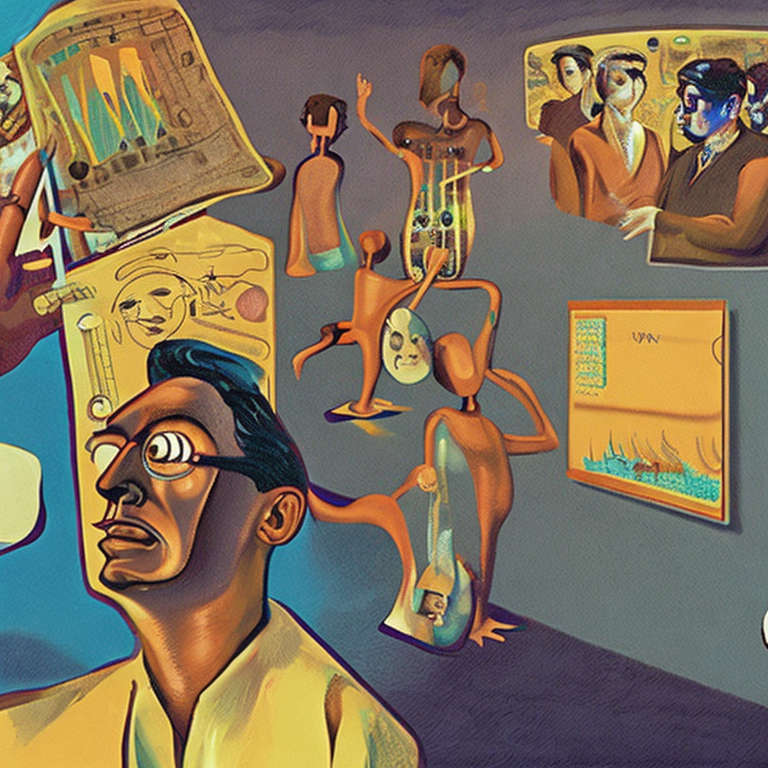

In [14]:
# Hugging Face の DiffusionPipeline ライブラリを使った画像生成

image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
    ).to("cuda")

# サルバドール・ダリのシュールなスタイルでAIについて学ぶデータサイエンティストのクラス
text = "A class of Data Scientists learning about AI, in the surreal style of Salvador Dali"

image = image_gen(prompt=text).images[0]
image

In [15]:
# Hugging Face の transformers pipeline ライブラリを使った音声生成
# SpeechT5ForTextToSpeechクラスはTransformerベースの音声合成モデルSpeechT5のラッパ

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

# 熟達への道を歩む人工知能エンジニアの皆さん、こんにちは!
speech = synthesiser("Hi to an artificial intelligence engineer, on the way to mastery!", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
Audio("speech.wav")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/585M [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

Device set to use cuda


config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

cmu-arctic-xvectors.py: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

default/validation/0000.parquet:   0%|          | 0.00/21.3M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/7931 [00:00<?, ? examples/s]

# 利用可能なすべてのパイプライン

トランスとディフューザーから利用可能なすべてのパイプラインを以下に示します。

私がこれを含めることを提案してくれた学生のラッキーPに感謝します！

このページのタスクの下にリストパイプラインがあります（少し下にスクロールしてから、パラメーターを展開してタスクを確認する必要があります）：

https://huggingface.co/docs/transformers/main_classes/pipelines

また、上記の拡散ピペラインを使用する画像生成の例に従って、変圧器の代わりに拡散モデルのタスクのこのリストもあります。

https://huggingface.co/docs/diffusers/en/api/pipelines/overview

他のパイプラインのクールな例を思いついた場合は、それらを私と共有してください！ Huggingfaceがこの高度なAI機能をこのような単純なAPIで推論するために利用できるようにするのは素晴らしいことです。